# Import data and packages

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
sns.set(style="darkgrid", color_codes=True)

# load data
df = pd.read_csv('./data/final_amazon_beauty.csv')

/Users/bea/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# we will be using bokeh but a couple of them will be run using matplotlob.pyplot
import matplotlib.pyplot as plt

# we need to ensure we are working with the current, stable release of bokeh.
# we will use bokeh for data visualization

!pip install -q bokeh==2.1.1

In [3]:
# standard bokeh imports
from bokeh.io import output_notebook, show, reset_output

# other bokeh imports
import bokeh
from bokeh.plotting import figure
from bokeh.palettes import Viridis256

output_notebook()

# more imports in cells below as needed


Loading BokehJS ...

In [4]:
df.head()

,rating,verified,review_time,reviewer_id,product_id,reviewer_name,reviewer_text,summary,vote,title,brand,rank,main_cat,description,also_view,also_buy,price,similar_item,details
0,5,False,2000-06-03,A2XMFX1BR0IJFJ,0061073717,Jonathan Reed (jonathan.reed2@virgin.net),This calender is brilliant and has plenty of g...,Futurama rules,2,Workout Headphones by Arena Essentials,HarperCollins,"3,235,148inBeautyamp;PersonalCare(",All Beauty,NaN,NaN,NaN,NaN,NaN,NaN
1,5,False,2000-05-06,ATKPYXA8XFKGJ,0061073717,Gwen Bates,This calender really is great. In addition to...,A great gift for any futurama fan!,NaN,Workout Headphones by Arena Essentials,HarperCollins,"3,235,148inBeautyamp;PersonalCare(",All Beauty,NaN,NaN,NaN,NaN,NaN,NaN
2,1,True,2015-02-19,A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN
3,4,True,2014-12-18,A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN
4,4,True,2014-08-10,A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN


### Product ID vs Product name



In [5]:
df.groupby('reviewer_id')['reviewer_name'].value_counts().head(30)

reviewer_id           reviewer_name   
A0010876CNE3ILIM9HV0  JR123               1
A001170867ZBE9FORRQL  Amber               2
A0028738FYF1SKPPC7B1  SHERYL MILLER       1
A0045356A23634W7RI4M  Verocruz44          1
A006277084SDH2LTUV6X  josh tubman         1
A0072285CLEIGDW2A0TB  Amazon Customer     1
A0076691MGD6V7MG3T62  Dalia Gutierrez     1
A00827299BWJTEFNVKP0  Sydney              1
A0087851X5PB4FBUJWQV  Melissa             1
A0090495K0FTJUG4CPSA  Serenity            1
A0096681Y127OL1H8W3U  Robert L.           1
A0114935P4A9MOTU5ESB  Tanya               1
A0123107LV997HN8Q1W1  Sandy               1
A012671347N9PAVZNSK8  Wwgop               1
A0127955G1ZQHYZFUZ0A  Amazon Customer     1
A0137540IHMZM8Q3V1QD  Joseline            2
A0148728MFRW1Y6J8UD4  Ankur Sharma        1
A0153524HC25D09HXMND  Terri Mendes        2
A01622269UK3A1DJVQKW  Sandra Farmer       1
A0163982I33BFLFLDW0T  Vincent             1
A0171852WOZCS4A8NKAR  joy booth           1
A01773147JLNASLMSYKG  Margaret       

In [6]:
df['reviewer_id'].value_counts()

A2GJX2KCUSR0EI    27
A1KSC91G9AIY2Z    23
A1EGCED01USBA9    21
A22CW0ZHY3NJH8    21
AENH50GW3OKDA     20
                  ..
A1E2M328ZDC7U3     1
A4O58A7LICJ9N      1
A8P2DO9VIZLI1      1
A36C8N562H9K0U     1
AOWKWIZTTOCQM      1
Name: reviewer_id, Length: 324038, dtype: int64

In [7]:
example = df[df.reviewer_id == 'A2GJX2KCUSR0EI']
example.groupby('reviewer_id')['title'].value_counts()

reviewer_id     title                                                                                                                                                                        
A2GJX2KCUSR0EI  Whish Coconut Shaving Cream - Smooth, All Natural Shave Cream for Men & Women, Leaves Skin so Soft, Shea Butter and Coconut Oil, Natural and Organic Skin Care - 5 oz. pump      4
                (3 Pack) e.l.f. Essential All Over Color Stick - Golden Peach                                                                                                                    1
                Briogeo - Rosarco Milk Reparative Leave-In Conditioning Spray, Ultra-Lightweight Leave-In Conditioner for Those with Dry, Damaged, and Brittle Hair, 5 oz                        1
                COVERGIRL Smoothers Moisturizing Concealer, 1 Tube (0.14 oz), For Fair Skin Tones, Solid Stick Concealer, Fragrance Free, Moisturizing (packaging may vary)                      1
                Givenchy Poudr

Reviewer ID is more unique that reviewer names 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         371345 non-null  int64 
 1   verified       371345 non-null  bool  
 2   review_time    371345 non-null  object
 3   reviewer_id    371345 non-null  object
 4   product_id     371345 non-null  object
 5   reviewer_name  371293 non-null  object
 6   reviewer_text  370946 non-null  object
 7   summary        371134 non-null  object
 8   vote           51899 non-null   object
 9   title          371329 non-null  object
 10  brand          283989 non-null  object
 11  rank           369010 non-null  object
 12  main_cat       371345 non-null  object
 13  description    258425 non-null  object
 14  also_view      217021 non-null  object
 15  also_buy       148452 non-null  object
 16  price          186438 non-null  object
 17  similar_item   10796 non-null   object
 18  deta

## Number of unique values

In [9]:
print('Reviews are taken from: {} to {}\n'. format(sorted(df.review_time.head(1)).pop(), 
                                                   sorted(df.review_time.tail(1)).pop()))
print('Number of reviews: {:,}'.format(len(df)))
print('Number of customers: {:,}'.format(len(df.reviewer_id.unique())))
print('Number of unique products: {:,}'.format(len(df.product_id.unique())))
print('Number of reviewer name: {:,}'.format(len(df.reviewer_name.unique())))
print('Number of unique name of products: {:,}'.format(len(df.title.unique())))
print('Number of product categories: {:,}'.format(len(df.main_cat.unique())))
print('Number of unique amount of votes: {:,}'.format(len(df.vote.unique())))


Reviews are taken from: 2000-06-03 to 2016-12-15

Number of reviews: 371,345
Number of customers: 324,038
Number of unique products: 32,586
Number of reviewer name: 221,127
Number of unique name of products: 32,392
Number of product categories: 1
Number of unique amount of votes: 392


## Missing data inspection

#### ask advice with Ana on if there's something I can do with this.

In [10]:
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(dataset)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
missing(df)

MISSING ROWS per COLUMN
rating: 0, 0.00%
verified: 0, 0.00%
review_time: 0, 0.00%
reviewer_id: 0, 0.00%
product_id: 0, 0.00%
reviewer_name: 52, 0.01%
reviewer_text: 399, 0.11%
summary: 211, 0.06%
vote: 319446, 86.02%
title: 16, 0.00%
brand: 87356, 23.52%
rank: 2335, 0.63%
main_cat: 0, 0.00%
description: 112920, 30.41%
also_view: 154324, 41.56%
also_buy: 222893, 60.02%
price: 184907, 49.79%
similar_item: 360549, 97.09%
details: 6918, 1.86%


## Changing Data types

Many of the columns are of data type "object" but we need them as strings.

In [11]:
# inspect a few rows
df.head(5)

,rating,verified,review_time,reviewer_id,product_id,reviewer_name,reviewer_text,summary,vote,title,brand,rank,main_cat,description,also_view,also_buy,price,similar_item,details
0,5,False,2000-06-03,A2XMFX1BR0IJFJ,0061073717,Jonathan Reed (jonathan.reed2@virgin.net),This calender is brilliant and has plenty of g...,Futurama rules,2,Workout Headphones by Arena Essentials,HarperCollins,"3,235,148inBeautyamp;PersonalCare(",All Beauty,NaN,NaN,NaN,NaN,NaN,NaN
1,5,False,2000-05-06,ATKPYXA8XFKGJ,0061073717,Gwen Bates,This calender really is great. In addition to...,A great gift for any futurama fan!,NaN,Workout Headphones by Arena Essentials,HarperCollins,"3,235,148inBeautyamp;PersonalCare(",All Beauty,NaN,NaN,NaN,NaN,NaN,NaN
2,1,True,2015-02-19,A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN
3,4,True,2014-12-18,A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN
4,4,True,2014-08-10,A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,NaN,Black Diamond,Swedish Beauty,"1,462,563inBeautyamp;PersonalCare(",All Beauty,['This is the NEW PURPLE BOTTLE that just came...,['B000LXTNMW'],NaN,NaN,NaN,NaN


In [12]:
# Why is description an array?
df.description[4]

"['This is the NEW PURPLE BOTTLE that just came out (not the old black bottle which came out years ago and has been discontinued)\\n\\nBlack Diamond\\nIndoor Lotion\\nTingle\\nNew\\nFull Size Bottle', '', '']"

# Initial data exploration

### Using Bokeh for data visualization

# *How to fix the size of the graph?*

In [13]:
df['reviewer_id'].value_counts()

A2GJX2KCUSR0EI    27
A1KSC91G9AIY2Z    23
A1EGCED01USBA9    21
A22CW0ZHY3NJH8    21
AENH50GW3OKDA     20
                  ..
A1E2M328ZDC7U3     1
A4O58A7LICJ9N      1
A8P2DO9VIZLI1      1
A36C8N562H9K0U     1
AOWKWIZTTOCQM      1
Name: reviewer_id, Length: 324038, dtype: int64

In [14]:
ratings_value_counts = df['rating'].value_counts()
ratings_value_counts

#convert the .value_counts() to a dataframe

ratings = ratings_value_counts.rename_axis('star_rating').reset_index(name='counts')
ratings = ratings.sort_values('star_rating')
ratings

,star_rating,counts
2,1,39261
4,2,20293
3,3,29555
1,4,52687
0,5,229549


#### The distribution of ratings across the total number of reviews

In [15]:
from bokeh.models import NumeralTickFormatter
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

sample = ratings
source = ColumnDataSource(sample)

x = ratings['star_rating'].astype(str)
# y = ratings['counts']

p = figure(x_range=x)

# color_map = factor_cmap(field_name='star_rating',
#                     palette=Spectral5, factors=ratings['star_rating'].astype(str))

p.vbar(x='star_rating', top='counts', source=source, width=0.5)

p.title.text ='The distribution of ratings across the total number of reviews'
p.xaxis.axis_label = 'star reviews'
p.yaxis.axis_label = 'count'

p.left[0].formatter.use_scientific = False # to remove scientific notation

hover = HoverTool()
hover.tooltips=[
    ('Star Rating', '@star_rating'),
    ('Count', '@counts'),
]

p.add_tools(hover)


show(p)


The reviewers rated most of the products listed in Amazon as 5-star. Looks like the customers liked the products from the Beauty section of the website.

#### Plotting the total number if reviews by year

In [16]:
# converting to datetime format
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df.review_time.apply(lambda x: x.year)
df['month'] = df.review_time.apply(lambda x: x.month)
# df.head()
# yearly = df.groupby(['year']).sum().reset_index()
yearly = df['year'].value_counts()

yearly = yearly.rename_axis('year').reset_index(name='counts')
yearly = yearly.sort_values('year')
yearly.head()

,year,counts
18,2000,13
17,2001,66
16,2002,78
15,2003,119
14,2004,292


In [17]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Yearly total number of reviews", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'counts'

p.left[0].formatter.use_scientific = False

# this code creates a big circle in a graph
p.circle(2016, yearly.counts.max(), size = 10, color = 'red')


p.line(yearly.year, yearly.counts,line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('# of reviews', '@y'),
]

show(p)

2016 is the year with the highest amount of reviews with 101,425 reviews total.

### The average ratings across the number of years

#### x values = average reviews

#### y values = years

In [18]:
# average = df.groupby('year')['overall'].mean().sort_values(ascending=False)

# ave_df = pd.Categorical(df['year'], ordered=True, categories=average.index)
# ave_df = df.sort_values('year')
# ave_df 

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ave = df.groupby('year').agg(np.mean).reset_index().sort_values(by='year')
ave


,year,rating,verified,month
0,2000,4.846154,0.000000,9.692308
1,2001,4.151515,0.227273,6.878788
2,2002,4.153846,0.192308,7.500000
3,2003,4.100840,0.218487,6.873950
4,2004,3.907534,0.243151,7.465753
5,2005,3.953571,0.267857,7.539286
6,2006,3.921776,0.346723,6.948203
7,2007,4.110677,0.401367,6.427409
8,2008,4.106978,0.440673,6.359761
9,2009,4.068752,0.534872,6.474311


In [19]:
sample = ave
source = ColumnDataSource(sample)

x = ave['year'].astype(str)
# y = ratings['counts']

# p = figure(x_range=x)


TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year vs. average reviews", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'counts'

p.left[0].formatter.use_scientific = False

# this code creates a big circle in a graph
p.circle(2000, ave.rating.max(), size = 10, color = 'red')


p.line(x='year', y='rating',line_color="purple", line_width = 3, source=source)
p.select_one(HoverTool).tooltips = [
    ('year', '@year'),
    ('avg rating', '@overall'),
]

show(p)

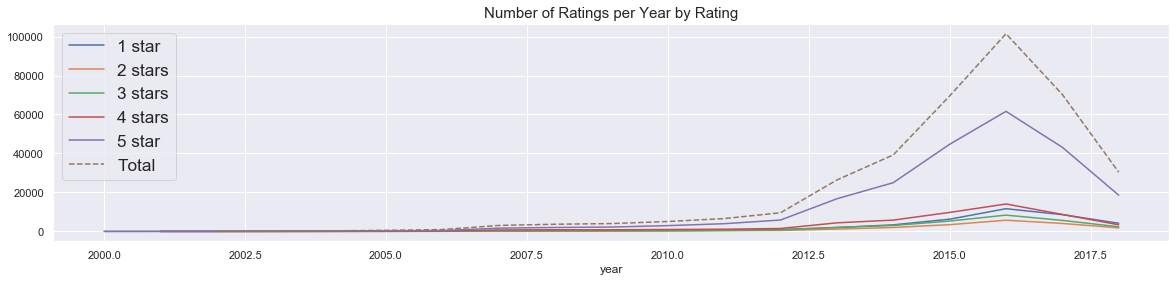

In [20]:
plt.figure(figsize=(20,4))

# # Find last rating date
# print('Last recorded rating was on {}'.format(df.reviewTime.tail(1).iloc[0]))

# Make sure all ratings have the same time frame
time = ['2001', '2002', '2003',
        '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']
# time = df['year'].unique().tolist()
# time = sorted(time)

# Separate ratings
one = df[df.rating == 1]
two = df[df.rating == 2]
three = df[df.rating == 3]
four = df[df.rating == 4]
five = df[df.rating == 5]


one_by_year = one.groupby('year').count().rating
two_by_year = two.groupby('year').count().rating
three_by_year = three.groupby('year').count().rating
four_by_year = four.groupby('year').count().rating
five_by_year = five.groupby('year').count().rating


# Plot number of ratings per year per rating
one_by_year.plot()
two_by_year.plot()
three_by_year.plot()
four_by_year.plot()
five_by_year.plot()

# Plot number of ratings per year
plt.plot(df.groupby('year').count().rating[2:], linestyle='--')
plt.title('Number of Ratings per Year by Rating', fontsize=15)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star', 'Total'], loc='upper left', fontsize='x-large')
plt.show()

# ***** ASK ANA IF THIS IS NECESSARY *****


# # Plot number of ratings per year per rating
# plt.figure(figsize=(20,7))
# plt.plot(time,  
#               # one.groupby('year').count().overall,
#               two_by_year, 
#               three_by_year[1:], 
#               # four.groupby('year').count().overall, 
#               # five.groupby('year').count()[1:].overall
#          )
# plt.title('Number of Ratings per Year Stacked', fontsize=18)

# plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star'], loc='upper left', fontsize='x-large')

# # plt.tight_layout()
# plt.show()

### Top 20 Most Reviewed Brands

#### * *Will need to sort this in descending order* *

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rating         371345 non-null  int64         
 1   verified       371345 non-null  bool          
 2   review_time    371345 non-null  datetime64[ns]
 3   reviewer_id    371345 non-null  object        
 4   product_id     371345 non-null  object        
 5   reviewer_name  371293 non-null  object        
 6   reviewer_text  370946 non-null  object        
 7   summary        371134 non-null  object        
 8   vote           51899 non-null   object        
 9   title          371329 non-null  object        
 10  brand          283989 non-null  object        
 11  rank           369010 non-null  object        
 12  main_cat       371345 non-null  object        
 13  description    258425 non-null  object        
 14  also_view      217021 non-null  object        
 15  

In [22]:
# Getting the top 20 brands with most reviews

most_brands = df['brand'].value_counts()

# convert the .value_counts() to a dataframe

most_brands = most_brands.rename_axis('brand').reset_index(name='counts')
most_brands = most_brands.sort_values('counts', ascending=False)
most_brands = most_brands.head(20)
most_brands

,brand,counts
0,Waterpik,17061
1,Philips Norelco,12427
2,Perfecto,4862
3,Astra,4578
4,Pre de Provence,3588
5,Helen Of Troy,3386
6,Aquaphor,2882
7,Braun,2636
8,Gillette,2576
9,Bath & Body Works,2525


In [23]:
# Preparing the data for Bokeh
source = ColumnDataSource(most_brands)
brands = most_brands['brand']
counts = most_brands['counts']

In [24]:
# We need to sort the brands from highest to lowest reviews
brands = brands.tolist()     # Convert to list to prevent issues sorting
counts = counts.tolist()

# sorting the bars means sorting the range factors
sorted_brands = sorted(brands, key=lambda x: counts[brands.index(x)], reverse=False)

# for x in brands:
    # i = brands.index(brand)  # Give me the index of the brand i'm on rn and put it in i
    # count_for_this_brand = counts[i]  # Use the same index to get the count for that brand
    # return count_for_this_brand

# Why does reverse=False show the plot in the opposite direction ?????
# sorted_brands

In [25]:
  # Plotting
p = figure(
  y_range=sorted_brands,
  title = 'Top 20 Brand with Most Reviews',
  x_axis_label ='# of reviews',
  plot_width=800,
  plot_height=600,
  tools=""
)

p.hbar(
    y='brand',
    right='counts',
    source=source,
    left=0,
    height=0.4,
    color='blue',
    fill_alpha=0.5
)
hover.tooltips=[('# of reviews', '@counts'),
                ('brand', '@brand')]

p.add_tools(hover)

show(p)


### Top 20 Most Reviewed Products

In [26]:
product_df = df['title'].value_counts()
product_df = product_df.rename_axis('title').reset_index(name='counts')
product_df = product_df.sort_values('counts', ascending=False)
product_df = product_df.head(20)

# Shorten title
product_df["title"] = product_df["title"].str[:50]


source = ColumnDataSource(product_df)
product = product_df['title']
count = product_df['counts']

# We need to sort the brands from highest to lowest reviews
products = product.tolist()     # Convert to list to prevent issues sorting
counts = count.tolist()

# sorting the bars means sorting the range factors
sorted_products = sorted(products, key=lambda x: counts[products.index(x)], reverse=False)


p = figure(
  y_range=sorted_products,
  title = 'Top 20 Products with Most Reviews',
  x_axis_label ='# of reviews',
  plot_width=900,
  plot_height=1000,
  tools=""
)

p.hbar(
    y='title',
    right='counts',
    source=source,
    left=0,
    height=0.4,
    color='blue',
    fill_alpha=0.5
)

hover.tooltips=[('# of reviews', '@counts'),
                ('product', '@title')]

p.add_tools(hover)

show(p)

most number of reviews - Waterpik Ultra Water Flosser

least number of reviews - Philips Sonicare Sonis Electric Rechargeable Toothbrush 

### Number of ratings per year



In [27]:
df.sort_values(by='year').head()

,rating,verified,review_time,reviewer_id,product_id,reviewer_name,reviewer_text,summary,vote,title,...,rank,main_cat,description,also_view,also_buy,price,similar_item,details,year,month
0,5,False,2000-06-03,A2XMFX1BR0IJFJ,0061073717,Jonathan Reed (jonathan.reed2@virgin.net),This calender is brilliant and has plenty of g...,Futurama rules,2,Workout Headphones by Arena Essentials,...,"3,235,148inBeautyamp;PersonalCare(",All Beauty,NaN,NaN,NaN,NaN,NaN,NaN,2000,6
7195,3,False,2000-12-27,A2JQJ540SQL126,B000050FED,Amazon Customer,This system does what it promises.. Removes ha...,Finally Free??,156,Finally Free F-140 Ultra-Permanent Hair Remova...,...,"3,138,970inBeautyPersonalCare(",All Beauty,"[""This convenient hair removal system offers t...",NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",2000,12
5013,5,False,2000-01-10,AL2PQBKHP7LM4,3317005939,thomas e chorba,"M (company) is about real people, and real exp...",Best book on Vietnam!,13,M.,...,"3,349,014inBeautyamp;PersonalCare(",All Beauty,['M? scara Red SOS Anti unravels and moisturiz...,NaN,NaN,NaN,NaN,NaN,2000,1
5204,5,False,2000-11-27,A131YSUOCKTSXK,B000050B60,Amazon Customer,I got this for my fiance. he has the softest f...,Awesome,18,Norelco 4821XL Micro Action Corded/Cordless Re...,...,"3,022,008inBeautyPersonalCare(",All Beauty,NaN,"['B01859QG3W', 'B00JITDVD2']",NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",2000,11
5208,5,False,2000-10-29,A1U7T7UCCV3SBN,B000050B62,Afshin Azimi Taleghani,"Very good shaver, I have always purchased Nore...",Fabulous Shaver,19,Norelco 5841XL Deluxe Reflex Action Cord/Cordl...,...,"3,359,846inBeautyamp;PersonalCare(",All Beauty,['Model No. 5841XL. Rechargeable cord/cordless...,['B00JITDVD2'],NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n\...",2000,10



# Statistical Inference

- Get the confidence interval of the mean/median of the whole dataset. Use bootstrap (check mini-project)
- What is the best way to adjust the average score per item in order to take into account the number of scores it received?

- How to get the confidence interval using only the sample size?

- https://www.evanmiller.org/how-not-to-sort-by-average-rating.html ---> this is basically breaking the 1-5 reviews into "good" and "bad".

In [28]:
# df['rating'][:5].tolist()

In [29]:
# We can set 3.0 as the cutoff between good and bad reviews


# pos_neg_review_scores = list(
#     map(lambda sc: [s >= 4 for s in sc], df.rating.tolist())
# )


# Machine learning 

In [30]:
data = df[['rating', 'reviewer_id', 'product_id']]
# len(df['asin'].value_counts()), len(df['reviewerID'].value_counts())
data

,rating,reviewer_id,product_id
0,5,A2XMFX1BR0IJFJ,0061073717
1,5,ATKPYXA8XFKGJ,0061073717
2,1,A1V6B6TNIC10QE,0143026860
3,4,A2F5GHSXFQ0W6J,0143026860
4,4,A1572GUYS7DGSR,0143026860
...,...,...,...
371340,1,A202DCI7TV1022,B01HJEGTYK
371341,5,A3FSOR5IJOFIBE,B01HJEGTYK
371342,5,A1B5DK6CTP2P24,B01HJEGTYK
371343,2,A23OUYS5IRMJS9,B01HJEGTYK


### Numpy Normalized product matrix

## Create a user-product matrix of of the over-all rates

In [31]:
# from https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/


# # This code crashes whenever I run this:
# ratings_mat = np.ndarray(
#     shape=(len(df['reviewerID']), len(df['asin'])),
#     dtype=np.uint8)

# ratings_mat[data.reviewerID.values-1, data.asin.values-1] = data.overall.values # I want to understand how this code works
# ratings_mat, np.shape(ratings_mat)

### Ana's code : 

In [32]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype

reviewers = data['reviewer_id'].unique().tolist()
products = data['product_id'].unique().tolist()
reviews = data['rating'].tolist()

row = data.product_id.astype(CategoricalDtype(categories=products)).cat.codes

col = data.reviewer_id.astype(CategoricalDtype(categories=reviewers)).cat.codes

sparse_matrix = csr_matrix((reviews, (row, col)), shape=(len(products), len(reviews)))
sparse_matrix

<32586x371345 sparse matrix of type '<class 'numpy.longlong'>'
	with 361605 stored elements in Compressed Sparse Row format>

In [33]:
# Initiating DF from the matrix


# dfs = pd.SparseDataFrame(sparse_matrix, \
#                          index=row.categories, \
#                          columns=col.categories)

In [34]:
d = data.product_id.astype(CategoricalDtype(categories=products))
d.cat

In [35]:
col.value_counts(), df['reviewer_id'].value_counts()
row

0             0
1             0
2             1
3             1
4             1
          ...  
371340    32585
371341    32585
371342    32585
371343    32585
371344    32585
Length: 371345, dtype: int16

In [36]:
n_users = data.reviewer_id.unique().shape[0]
n_items = data.product_id.unique().shape[0]
n_users, n_items


# # This code crashes whenever I run this:


# data_matrix = np.zeros((n_users, n_items))

# # Maybe the same as the cell above?
# for line in ratings.itertuples():
#     data_matrix[line[1]-1, line[2]-1] = line[3]

(324038, 32586)

In [37]:
user_c = CategoricalDtype(sorted(df.reviewer_id.unique()), ordered=True)
movie_c = CategoricalDtype(sorted(df.product_id.unique()), ordered=True)

row = df.reviewer_id.astype(user_c).cat.codes
col = df.product_id.astype(movie_c).cat.codes
sparse_matrix = csr_matrix((df['rating'], (row, col)), \
                           shape=(user_c.categories.size, movie_c.categories.size))


## Pivot Table

## Not showing the entire products

In [38]:
# data = df[['rating', 'reviewer_id', 'product_id']]
# data_table = pd.pivot_table(data,index=["reviewer_id"], columns=["product_id"], values=['rating'], fill_value=0)
# data_table

# # data.reviewerID.unique().shape[0]

### Resampling frequent reviewers

#### Applying recommender system on frequent reviewers >4 reviews

In [39]:
# # frequency = df['reviewerID'].value_counts()
# frequent = (df['reviewerID'].value_counts()[df['reviewerID'].value_counts()> 5]).to_frame()
# reviewers = frequent.reviewerID.to_list()
# top = df['reviewerID'].isin(reviewers)
# top